In [1]:
import openmc
import openmc.deplete

%matplotlib inline
import numpy as np

In [2]:
fuel = openmc.Material(name="uo2")
fuel.add_element("U", 1, percent_type="ao", enrichment=4.25)
fuel.add_element("O", 2)
fuel.set_density("g/cc", 10.4)

clad = openmc.Material(name='clad');
clad.add_element("Zr",1);
clad.set_density('g/cc',6.0);

water = openmc.Material(name='water');
water.add_element('O',1);
water.add_element('H',2)
water.set_density('g/cc',0.712); # high temperature density
water.add_s_alpha_beta('c_H_in_H2O');

materials = openmc.Materials([fuel,clad,water]);

In [3]:
h_core = 300.; 
h_fuel = 200.;

r_fuel = 0.42;
r_pin = 0.45;

P_D = 1.4;

pitch = P_D*2*r_pin;

fuel_temp = 900; # K, guess at fuel temperature
mod_temp = 600; # K, moderator temperature

# fuel cylinder:
fuel_cyl = openmc.model.RightCircularCylinder([0.,0.,-h_fuel/2.],
                                             h_fuel, r_fuel);

fuel.volume = np.pi*(r_fuel**2)*h_fuel;

# pin cylinder
pin_cyl = openmc.model.RightCircularCylinder([0.,0.,-(h_fuel+(r_pin-r_fuel))/2.],
                                            h_fuel+(r_pin-r_fuel)*2.,r_pin);

# pin cell container
core_cell = openmc.model.RectangularParallelepiped(-pitch/2.,pitch/2.,
                                                  -pitch/2.,pitch/2.,
                                                  -h_core/2.,h_core/2.,
                                                  boundary_type='reflective');

fuel_cell = openmc.Cell();
fuel_cell.region = -fuel_cyl
fuel_cell.fill = fuel;
fuel_cell.temperature = fuel_temp;


clad_cell = openmc.Cell();
clad_cell.region = +fuel_cyl & -pin_cyl;
clad_cell.fill = clad;

mod_cell = openmc.Cell();
mod_cell.region = +pin_cyl & -core_cell;
mod_cell.fill = water

root_univ = openmc.Universe();
root_univ.add_cells([fuel_cell,clad_cell,mod_cell]);

geometry = openmc.Geometry();
geometry.root_universe = root_univ;



materials.export_to_xml();
geometry.export_to_xml();



In [4]:
settings = openmc.Settings();
settings.run_mode = 'eigenvalue';
settings.particles = 10000;
settings.batches = 100;
settings.inactive = 25

box = openmc.stats.Box(lower_left = (-r_fuel,-r_fuel,-h_fuel/2.),
                      upper_right = (r_fuel,r_fuel,h_fuel/2.),
                      only_fissionable=True);
src = openmc.Source(space=box);

settings.source = src;

settings.temperature['method']='interpolation';

settings.export_to_xml();

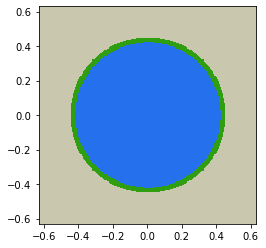

In [5]:
root_univ.plot(width=(pitch,pitch));

In [6]:
openmc.run();

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

note for cold begining of life, $k_{\text{eff}} = 1.45998 \pm 0.00154$.

for hot beginning of life, $k_{\text{eff}} = 1.37613 \pm 0.00153$.

In [7]:
#operator = openmc.deplete.Operator(geometry,settings,"chain_casl_pwr.xml");
operator = openmc.deplete.Operator(geometry,settings,"chain_endfb71_pwr.xml");


power = 1e4;
days = 24*3600;
time_steps = [0.1*days,0.1*days,0.3*days,0.5*days,1.*days,30.*days,30.*days,100.*days, 360.*days, 360.*days, 360.*days,360.*days,720.*days,720.*days];
integrator = openmc.deplete.PredictorIntegrator(operator,time_steps,power=power);

In [8]:
integrator.integrate()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Mg24 from /home/sblair/OMC_DATA/endfb71_hdf5/Mg24.h5
 Reading Mg25 from /home/sblair/OMC_DATA/endfb71_hdf5/Mg25.h5
 Reading Mg26 from /home/sblair/OMC_DATA/endfb71_hdf5/Mg26.h5
 Reading Al27 from /home/sblair/OMC_DATA/endfb71_hdf5/Al27.h5
 Reading Si28 from /home/sblair/OMC_DATA/endfb71_hdf5/Si28.h5
 Reading Si29 from /home/sblair/OMC_DATA/endfb71_hdf5/Si29.h5
 Reading Si30 from /home/sblair/OMC_DATA/endfb71_hdf5/Si30.h5
 Reading P31 from /home/sblair/OMC_DATA/endfb71_hdf5/P31.h5
 Reading S32 from /home/sblair/OMC_DATA/endfb71_hdf5/S32.h5
 Reading S33 from /home/sblair/OMC_DATA/endfb71_hdf5/S33.h5
 Reading S34 from /home/sblair/OMC_DATA/endfb71_hdf5/S34.h5
 Reading S36 from /home/sblair/OMC_DATA/endfb71_hdf5/S36.h5
 Reading Cl35 from /home/sblair/OMC_DATA/endfb71_hdf5/Cl35.h5
 Reading Cl37 from /home/sblair/OMC_DATA/endfb71_hdf5/Cl37.h5
 Reading Ar36 from /home/sblair/OMC_DATA/endfb71_hdf5/Ar36.h5
 Reading Ar38 from /home/sblair/OMC_DATA/endfb71_hdf5/Ar38.h5
 Reading Ar40 from

 Reading K41 from /home/sblair/OMC_DATA/endfb71_hdf5/K41.h5
 Reading Ca40 from /home/sblair/OMC_DATA/endfb71_hdf5/Ca40.h5
 Reading Ca42 from /home/sblair/OMC_DATA/endfb71_hdf5/Ca42.h5
 Reading Ca43 from /home/sblair/OMC_DATA/endfb71_hdf5/Ca43.h5
 Reading Ca44 from /home/sblair/OMC_DATA/endfb71_hdf5/Ca44.h5
 Reading Ca46 from /home/sblair/OMC_DATA/endfb71_hdf5/Ca46.h5
 Reading Ca48 from /home/sblair/OMC_DATA/endfb71_hdf5/Ca48.h5
 Reading Sc45 from /home/sblair/OMC_DATA/endfb71_hdf5/Sc45.h5
 Reading Ti46 from /home/sblair/OMC_DATA/endfb71_hdf5/Ti46.h5
 Reading Ti47 from /home/sblair/OMC_DATA/endfb71_hdf5/Ti47.h5
 Reading Ti48 from /home/sblair/OMC_DATA/endfb71_hdf5/Ti48.h5
 Reading Ti49 from /home/sblair/OMC_DATA/endfb71_hdf5/Ti49.h5
 Reading Ti50 from /home/sblair/OMC_DATA/endfb71_hdf5/Ti50.h5
 Reading V50 from /home/sblair/OMC_DATA/endfb71_hdf5/V50.h5
 Reading V51 from /home/sblair/OMC_DATA/endfb71_hdf5/V51.h5
 Reading Cr50 from /home/sblair/OMC_DATA/endfb71_hdf5/Cr50.h5
 Reading Cr52 

 Reading Br81 from /home/sblair/OMC_DATA/endfb71_hdf5/Br81.h5
 Reading Kr78 from /home/sblair/OMC_DATA/endfb71_hdf5/Kr78.h5
 Reading Kr80 from /home/sblair/OMC_DATA/endfb71_hdf5/Kr80.h5
 Reading Kr82 from /home/sblair/OMC_DATA/endfb71_hdf5/Kr82.h5
 Reading Kr83 from /home/sblair/OMC_DATA/endfb71_hdf5/Kr83.h5
 Reading Kr84 from /home/sblair/OMC_DATA/endfb71_hdf5/Kr84.h5
 Reading Kr85 from /home/sblair/OMC_DATA/endfb71_hdf5/Kr85.h5
 Reading Kr86 from /home/sblair/OMC_DATA/endfb71_hdf5/Kr86.h5
 Reading Rb85 from /home/sblair/OMC_DATA/endfb71_hdf5/Rb85.h5
 Reading Rb86 from /home/sblair/OMC_DATA/endfb71_hdf5/Rb86.h5
 Reading Rb87 from /home/sblair/OMC_DATA/endfb71_hdf5/Rb87.h5
 Reading Sr84 from /home/sblair/OMC_DATA/endfb71_hdf5/Sr84.h5
 Reading Sr86 from /home/sblair/OMC_DATA/endfb71_hdf5/Sr86.h5
 Reading Sr87 from /home/sblair/OMC_DATA/endfb71_hdf5/Sr87.h5
 Reading Sr88 from /home/sblair/OMC_DATA/endfb71_hdf5/Sr88.h5
 Reading Sr89 from /home/sblair/OMC_DATA/endfb71_hdf5/Sr89.h5
 Reading

 Reading Nb95 from /home/sblair/OMC_DATA/endfb71_hdf5/Nb95.h5
 Reading Mo92 from /home/sblair/OMC_DATA/endfb71_hdf5/Mo92.h5
 Reading Mo94 from /home/sblair/OMC_DATA/endfb71_hdf5/Mo94.h5
 Reading Mo95 from /home/sblair/OMC_DATA/endfb71_hdf5/Mo95.h5
 Reading Mo96 from /home/sblair/OMC_DATA/endfb71_hdf5/Mo96.h5
 Reading Mo97 from /home/sblair/OMC_DATA/endfb71_hdf5/Mo97.h5
 Reading Mo98 from /home/sblair/OMC_DATA/endfb71_hdf5/Mo98.h5
 Reading Mo99 from /home/sblair/OMC_DATA/endfb71_hdf5/Mo99.h5


 Reading Mo100 from /home/sblair/OMC_DATA/endfb71_hdf5/Mo100.h5
 Reading Tc99 from /home/sblair/OMC_DATA/endfb71_hdf5/Tc99.h5
 Reading Ru96 from /home/sblair/OMC_DATA/endfb71_hdf5/Ru96.h5
 Reading Ru98 from /home/sblair/OMC_DATA/endfb71_hdf5/Ru98.h5
 Reading Ru99 from /home/sblair/OMC_DATA/endfb71_hdf5/Ru99.h5
 Reading Ru100 from /home/sblair/OMC_DATA/endfb71_hdf5/Ru100.h5
 Reading Ru101 from /home/sblair/OMC_DATA/endfb71_hdf5/Ru101.h5
 Reading Ru102 from /home/sblair/OMC_DATA/endfb71_hdf5/Ru102.h5
 Reading Ru103 from /home/sblair/OMC_DATA/endfb71_hdf5/Ru103.h5
 Reading Ru104 from /home/sblair/OMC_DATA/endfb71_hdf5/Ru104.h5
 Reading Ru105 from /home/sblair/OMC_DATA/endfb71_hdf5/Ru105.h5
 Reading Ru106 from /home/sblair/OMC_DATA/endfb71_hdf5/Ru106.h5
 Reading Rh103 from /home/sblair/OMC_DATA/endfb71_hdf5/Rh103.h5
 Reading Rh105 from /home/sblair/OMC_DATA/endfb71_hdf5/Rh105.h5
 Reading Pd102 from /home/sblair/OMC_DATA/endfb71_hdf5/Pd102.h5
 Reading Pd104 from /home/sblair/OMC_DATA/endfb7

          1200K
          2500K


 Reading Cd111 from /home/sblair/OMC_DATA/endfb71_hdf5/Cd111.h5
 Reading Cd112 from /home/sblair/OMC_DATA/endfb71_hdf5/Cd112.h5
 Reading Cd113 from /home/sblair/OMC_DATA/endfb71_hdf5/Cd113.h5
 Reading Cd114 from /home/sblair/OMC_DATA/endfb71_hdf5/Cd114.h5
 Reading Cd115_m1 from /home/sblair/OMC_DATA/endfb71_hdf5/Cd115_m1.h5
 Reading Cd116 from /home/sblair/OMC_DATA/endfb71_hdf5/Cd116.h5
 Reading In113 from /home/sblair/OMC_DATA/endfb71_hdf5/In113.h5
 Reading In115 from /home/sblair/OMC_DATA/endfb71_hdf5/In115.h5
 Reading Sn112 from /home/sblair/OMC_DATA/endfb71_hdf5/Sn112.h5
 Reading Sn113 from /home/sblair/OMC_DATA/endfb71_hdf5/Sn113.h5
 Reading Sn114 from /home/sblair/OMC_DATA/endfb71_hdf5/Sn114.h5
 Reading Sn115 from /home/sblair/OMC_DATA/endfb71_hdf5/Sn115.h5
 Reading Sn116 from /home/sblair/OMC_DATA/endfb71_hdf5/Sn116.h5
 Reading Sn117 from /home/sblair/OMC_DATA/endfb71_hdf5/Sn117.h5
 Reading Sn118 from /home/sblair/OMC_DATA/endfb71_hdf5/Sn118.h5
 Reading Sn119 from /home/sblair/O

          1200K
          2500K


 Reading Sn125 from /home/sblair/OMC_DATA/endfb71_hdf5/Sn125.h5
 Reading Sn126 from /home/sblair/OMC_DATA/endfb71_hdf5/Sn126.h5
 Reading Sb121 from /home/sblair/OMC_DATA/endfb71_hdf5/Sb121.h5
 Reading Sb123 from /home/sblair/OMC_DATA/endfb71_hdf5/Sb123.h5
 Reading Sb124 from /home/sblair/OMC_DATA/endfb71_hdf5/Sb124.h5
 Reading Sb125 from /home/sblair/OMC_DATA/endfb71_hdf5/Sb125.h5
 Reading Sb126 from /home/sblair/OMC_DATA/endfb71_hdf5/Sb126.h5
 Reading Te120 from /home/sblair/OMC_DATA/endfb71_hdf5/Te120.h5
 Reading Te122 from /home/sblair/OMC_DATA/endfb71_hdf5/Te122.h5


          1200K
          2500K


 Reading Te123 from /home/sblair/OMC_DATA/endfb71_hdf5/Te123.h5
 Reading Te124 from /home/sblair/OMC_DATA/endfb71_hdf5/Te124.h5
 Reading Te125 from /home/sblair/OMC_DATA/endfb71_hdf5/Te125.h5
 Reading Te126 from /home/sblair/OMC_DATA/endfb71_hdf5/Te126.h5
 Reading Te127_m1 from /home/sblair/OMC_DATA/endfb71_hdf5/Te127_m1.h5
 Reading Te128 from /home/sblair/OMC_DATA/endfb71_hdf5/Te128.h5
 Reading Te129_m1 from /home/sblair/OMC_DATA/endfb71_hdf5/Te129_m1.h5
 Reading Te130 from /home/sblair/OMC_DATA/endfb71_hdf5/Te130.h5
 Reading Te132 from /home/sblair/OMC_DATA/endfb71_hdf5/Te132.h5
 Reading I127 from /home/sblair/OMC_DATA/endfb71_hdf5/I127.h5
 Reading I129 from /home/sblair/OMC_DATA/endfb71_hdf5/I129.h5
 Reading I130 from /home/sblair/OMC_DATA/endfb71_hdf5/I130.h5
 Reading I131 from /home/sblair/OMC_DATA/endfb71_hdf5/I131.h5
 Reading I135 from /home/sblair/OMC_DATA/endfb71_hdf5/I135.h5


 Reading Xe123 from /home/sblair/OMC_DATA/endfb71_hdf5/Xe123.h5
 Reading Xe124 from /home/sblair/OMC_DATA/endfb71_hdf5/Xe124.h5
 Reading Xe126 from /home/sblair/OMC_DATA/endfb71_hdf5/Xe126.h5
 Reading Xe128 from /home/sblair/OMC_DATA/endfb71_hdf5/Xe128.h5
 Reading Xe129 from /home/sblair/OMC_DATA/endfb71_hdf5/Xe129.h5
 Reading Xe130 from /home/sblair/OMC_DATA/endfb71_hdf5/Xe130.h5
 Reading Xe131 from /home/sblair/OMC_DATA/endfb71_hdf5/Xe131.h5
 Reading Xe132 from /home/sblair/OMC_DATA/endfb71_hdf5/Xe132.h5
 Reading Xe133 from /home/sblair/OMC_DATA/endfb71_hdf5/Xe133.h5
 Reading Xe134 from /home/sblair/OMC_DATA/endfb71_hdf5/Xe134.h5
 Reading Xe135 from /home/sblair/OMC_DATA/endfb71_hdf5/Xe135.h5
 Reading Xe136 from /home/sblair/OMC_DATA/endfb71_hdf5/Xe136.h5
 Reading Cs133 from /home/sblair/OMC_DATA/endfb71_hdf5/Cs133.h5


          2500K


 Reading Cs134 from /home/sblair/OMC_DATA/endfb71_hdf5/Cs134.h5
 Reading Cs135 from /home/sblair/OMC_DATA/endfb71_hdf5/Cs135.h5
 Reading Cs136 from /home/sblair/OMC_DATA/endfb71_hdf5/Cs136.h5
 Reading Cs137 from /home/sblair/OMC_DATA/endfb71_hdf5/Cs137.h5
 Reading Ba130 from /home/sblair/OMC_DATA/endfb71_hdf5/Ba130.h5


          1200K
          2500K


 Reading Ba132 from /home/sblair/OMC_DATA/endfb71_hdf5/Ba132.h5
 Reading Ba133 from /home/sblair/OMC_DATA/endfb71_hdf5/Ba133.h5
 Reading Ba134 from /home/sblair/OMC_DATA/endfb71_hdf5/Ba134.h5
 Reading Ba135 from /home/sblair/OMC_DATA/endfb71_hdf5/Ba135.h5
 Reading Ba136 from /home/sblair/OMC_DATA/endfb71_hdf5/Ba136.h5
 Reading Ba137 from /home/sblair/OMC_DATA/endfb71_hdf5/Ba137.h5
 Reading Ba138 from /home/sblair/OMC_DATA/endfb71_hdf5/Ba138.h5
 Reading Ba140 from /home/sblair/OMC_DATA/endfb71_hdf5/Ba140.h5
 Reading La138 from /home/sblair/OMC_DATA/endfb71_hdf5/La138.h5
 Reading La139 from /home/sblair/OMC_DATA/endfb71_hdf5/La139.h5
 Reading La140 from /home/sblair/OMC_DATA/endfb71_hdf5/La140.h5
 Reading Ce136 from /home/sblair/OMC_DATA/endfb71_hdf5/Ce136.h5
 Reading Ce138 from /home/sblair/OMC_DATA/endfb71_hdf5/Ce138.h5
 Reading Ce139 from /home/sblair/OMC_DATA/endfb71_hdf5/Ce139.h5
 Reading Ce140 from /home/sblair/OMC_DATA/endfb71_hdf5/Ce140.h5
 Reading Ce141 from /home/sblair/OMC_DAT

          1200K
          2500K


 Reading Gd152 from /home/sblair/OMC_DATA/endfb71_hdf5/Gd152.h5
 Reading Gd153 from /home/sblair/OMC_DATA/endfb71_hdf5/Gd153.h5
 Reading Gd154 from /home/sblair/OMC_DATA/endfb71_hdf5/Gd154.h5
 Reading Gd155 from /home/sblair/OMC_DATA/endfb71_hdf5/Gd155.h5
 Reading Gd156 from /home/sblair/OMC_DATA/endfb71_hdf5/Gd156.h5
 Reading Gd157 from /home/sblair/OMC_DATA/endfb71_hdf5/Gd157.h5
 Reading Gd158 from /home/sblair/OMC_DATA/endfb71_hdf5/Gd158.h5
 Reading Gd160 from /home/sblair/OMC_DATA/endfb71_hdf5/Gd160.h5
 Reading Tb159 from /home/sblair/OMC_DATA/endfb71_hdf5/Tb159.h5
 Reading Tb160 from /home/sblair/OMC_DATA/endfb71_hdf5/Tb160.h5
 Reading Dy156 from /home/sblair/OMC_DATA/endfb71_hdf5/Dy156.h5
 Reading Dy158 from /home/sblair/OMC_DATA/endfb71_hdf5/Dy158.h5
 Reading Dy160 from /home/sblair/OMC_DATA/endfb71_hdf5/Dy160.h5
 Reading Dy161 from /home/sblair/OMC_DATA/endfb71_hdf5/Dy161.h5
 Reading Dy162 from /home/sblair/OMC_DATA/endfb71_hdf5/Dy162.h5
 Reading Dy163 from /home/sblair/OMC_DAT

 Reading Cf246 from /home/sblair/OMC_DATA/endfb71_hdf5/Cf246.h5
 Reading Cf248 from /home/sblair/OMC_DATA/endfb71_hdf5/Cf248.h5
 Reading Cf249 from /home/sblair/OMC_DATA/endfb71_hdf5/Cf249.h5
 Reading Cf250 from /home/sblair/OMC_DATA/endfb71_hdf5/Cf250.h5
 Reading Cf251 from /home/sblair/OMC_DATA/endfb71_hdf5/Cf251.h5
 Reading Cf252 from /home/sblair/OMC_DATA/endfb71_hdf5/Cf252.h5


          1200K


 Reading Cf253 from /home/sblair/OMC_DATA/endfb71_hdf5/Cf253.h5
 Reading Cf254 from /home/sblair/OMC_DATA/endfb71_hdf5/Cf254.h5
 Reading Es251 from /home/sblair/OMC_DATA/endfb71_hdf5/Es251.h5
 Reading Es252 from /home/sblair/OMC_DATA/endfb71_hdf5/Es252.h5
 Reading Es253 from /home/sblair/OMC_DATA/endfb71_hdf5/Es253.h5
 Reading Es254 from /home/sblair/OMC_DATA/endfb71_hdf5/Es254.h5
 Reading Es254_m1 from /home/sblair/OMC_DATA/endfb71_hdf5/Es254_m1.h5
 Reading Es255 from /home/sblair/OMC_DATA/endfb71_hdf5/Es255.h5
 Reading Fm255 from /home/sblair/OMC_DATA/endfb71_hdf5/Fm255.h5
 Maximum neutron transport energy: 8100000.0 eV for Be7


 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.32884
        2/1    1.35332
        3/1    1.34665
        4/1    1.34746
        5/1    1.34461
        6/1    1.37183
        7/1    1.37622
        8/1    1.35790
        9/1    1.38695
       10/1    1.34149
       11/1    1.37623
       12/1    1.38944
       13/1    1.36774
       14/1    1.33801
       15/1    1.39395
       16/1    1.37919
       17/1    1.33842
       18/1    1.36316
       19/1    1.33954
       20/1    1.40535
       21/1    1.36211
       22/1    1.36837
       23/1    1.37345
       24/1    1.34228
       25/1    1.38285
       26/1    1.37584
       27/1    1.38573    1.38078 +/- 0.00494
       28/1    1.37613    1.37923 +/- 0.00325
       29/1    1.37856    1.37906 +/- 0.00230
       30/1    1.38760    1.38077 +/- 0.00247
       31/1    1.36

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.34733
        2/1    1.33368
        3/1    1.35323
        4/1    1.36764
        5/1    1.33297
        6/1    1.36292
        7/1    1.37328
        8/1    1.36539
        9/1    1.37566
       10/1    1.36287
       11/1    1.35159
       12/1    1.36100
       13/1    1.39061
       14/1    1.38899
       15/1    1.38425
       16/1    1.35279
       17/1    1.37704
       18/1    1.36372
       19/1    1.37775
       20/1    1.38431
       21/1    1.34313
       22/1    1.38636
       23/1    1.37863
       24/1    1.34727
       25/1    1.36216
       26/1    1.40172
       27/1    1.36163    1.38168 +/- 0.02005
       28/1    1.36811    1.37715 +/- 0.01243
       29/1    1.38396    1.37886 +/- 0.00895
       30/1    1.38722    1.38053 +/- 0.00713
       31/1    1.35

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.34396
        2/1    1.35591
        3/1    1.36820
        4/1    1.37013
        5/1    1.35441
        6/1    1.36300
        7/1    1.35927
        8/1    1.40418
        9/1    1.35726
       10/1    1.36781
       11/1    1.36038
       12/1    1.35849
       13/1    1.36647
       14/1    1.36884
       15/1    1.35262
       16/1    1.34180
       17/1    1.36567
       18/1    1.37505
       19/1    1.39904
       20/1    1.37691
       21/1    1.34465
       22/1    1.36617
       23/1    1.38864
       24/1    1.39533
       25/1    1.35559
       26/1    1.35581
       27/1    1.38396    1.36988 +/- 0.01408
       28/1    1.36987    1.36988 +/- 0.00813
       29/1    1.37498    1.37116 +/- 0.00589
       30/1    1.35706    1.36834 +/- 0.00536
       31/1    1.38

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.33137
        2/1    1.31820
        3/1    1.32478
        4/1    1.37661
        5/1    1.34729
        6/1    1.34721
        7/1    1.37298
        8/1    1.34819
        9/1    1.33648
       10/1    1.34149
       11/1    1.35210
       12/1    1.34320
       13/1    1.35407
       14/1    1.36659
       15/1    1.38315
       16/1    1.35218
       17/1    1.35117
       18/1    1.36080
       19/1    1.36609
       20/1    1.36850
       21/1    1.33955
       22/1    1.36887
       23/1    1.35642
       24/1    1.38296
       25/1    1.35063
       26/1    1.39165
       27/1    1.37240    1.38203 +/- 0.00962
       28/1    1.36695    1.37700 +/- 0.00749
       29/1    1.34744    1.36961 +/- 0.00909
       30/1    1.36445    1.36858 +/- 0.00712
       31/1    1.36

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.35202
        2/1    1.34323
        3/1    1.34296
        4/1    1.34318
        5/1    1.34470
        6/1    1.33112
        7/1    1.33529
        8/1    1.37409
        9/1    1.33973
       10/1    1.35224
       11/1    1.35987
       12/1    1.36073
       13/1    1.35531
       14/1    1.34313
       15/1    1.36225
       16/1    1.38287
       17/1    1.36800
       18/1    1.35425
       19/1    1.35094
       20/1    1.32977
       21/1    1.34305
       22/1    1.36020
       23/1    1.35255
       24/1    1.36045
       25/1    1.38194
       26/1    1.36327
       27/1    1.33852    1.35090 +/- 0.01237
       28/1    1.35447    1.35209 +/- 0.00724
       29/1    1.37192    1.35705 +/- 0.00713
       30/1    1.34832    1.35530 +/- 0.00579
       31/1    1.36

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.34252
        2/1    1.33578
        3/1    1.36448
        4/1    1.34842
        5/1    1.34040
        6/1    1.36927
        7/1    1.33637
        8/1    1.39552
        9/1    1.34940
       10/1    1.33513
       11/1    1.34089
       12/1    1.34235
       13/1    1.34002
       14/1    1.34975
       15/1    1.35918
       16/1    1.32796
       17/1    1.35609
       18/1    1.34870
       19/1    1.34916
       20/1    1.33937
       21/1    1.38227
       22/1    1.32612
       23/1    1.37368
       24/1    1.34568
       25/1    1.37596
       26/1    1.34053
       27/1    1.33230    1.33641 +/- 0.00411
       28/1    1.34330    1.33871 +/- 0.00330
       29/1    1.34777    1.34097 +/- 0.00326
       30/1    1.36532    1.34584 +/- 0.00548
       31/1    1.34

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.32677
        2/1    1.32770
        3/1    1.33668
        4/1    1.31376
        5/1    1.34376
        6/1    1.36201
        7/1    1.33135
        8/1    1.33396
        9/1    1.34649
       10/1    1.32481
       11/1    1.33913
       12/1    1.31966
       13/1    1.36665
       14/1    1.33761
       15/1    1.32852
       16/1    1.33809
       17/1    1.35870
       18/1    1.33680
       19/1    1.34400
       20/1    1.34393
       21/1    1.35367
       22/1    1.32240
       23/1    1.32956
       24/1    1.34280
       25/1    1.34311
       26/1    1.36225
       27/1    1.35033    1.35629 +/- 0.00596
       28/1    1.32377    1.34545 +/- 0.01137
       29/1    1.32300    1.33984 +/- 0.00981
       30/1    1.33312    1.33850 +/- 0.00771
       31/1    1.33

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.31098
        2/1    1.32945
        3/1    1.32444
        4/1    1.31102
        5/1    1.34550
        6/1    1.33208
        7/1    1.31345
        8/1    1.33242
        9/1    1.32341
       10/1    1.36444
       11/1    1.32890
       12/1    1.34959
       13/1    1.34595
       14/1    1.31110
       15/1    1.32553
       16/1    1.31565
       17/1    1.32368
       18/1    1.32529
       19/1    1.33317
       20/1    1.31959
       21/1    1.32228
       22/1    1.36287
       23/1    1.33715
       24/1    1.34656
       25/1    1.35958
       26/1    1.32914
       27/1    1.35575    1.34244 +/- 0.01330
       28/1    1.35923    1.34804 +/- 0.00950
       29/1    1.34307    1.34680 +/- 0.00683
       30/1    1.31288    1.34001 +/- 0.00860
       31/1    1.33

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.27828
        2/1    1.29718
        3/1    1.31861
        4/1    1.29928
        5/1    1.30335
        6/1    1.30852
        7/1    1.30352
        8/1    1.30009
        9/1    1.29235
       10/1    1.29846
       11/1    1.34224
       12/1    1.30554
       13/1    1.28768
       14/1    1.33821
       15/1    1.32644
       16/1    1.34853
       17/1    1.30113
       18/1    1.28701
       19/1    1.30301
       20/1    1.33239
       21/1    1.31836
       22/1    1.31960
       23/1    1.33198
       24/1    1.31757
       25/1    1.30500
       26/1    1.30144
       27/1    1.33649    1.31897 +/- 0.01752
       28/1    1.29797    1.31197 +/- 0.01230
       29/1    1.31579    1.31292 +/- 0.00875
       30/1    1.32384    1.31511 +/- 0.00712
       31/1    1.33

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.23907
        2/1    1.24499
        3/1    1.30079
        4/1    1.25924
        5/1    1.28971
        6/1    1.28219
        7/1    1.27315
        8/1    1.28822
        9/1    1.28221
       10/1    1.27022
       11/1    1.28241
       12/1    1.24216
       13/1    1.25191
       14/1    1.29877
       15/1    1.30108
       16/1    1.25692
       17/1    1.28857
       18/1    1.27222
       19/1    1.25815
       20/1    1.28586
       21/1    1.27230
       22/1    1.25160
       23/1    1.26487
       24/1    1.28393
       25/1    1.27275
       26/1    1.25896
       27/1    1.28059    1.26978 +/- 0.01081
       28/1    1.28032    1.27329 +/- 0.00716
       29/1    1.23842    1.26457 +/- 0.01008
       30/1    1.28158    1.26797 +/- 0.00852
       31/1    1.27

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.24153
        2/1    1.22301
        3/1    1.22608
        4/1    1.25055
        5/1    1.24043
        6/1    1.24378
        7/1    1.21427
        8/1    1.23452
        9/1    1.24528
       10/1    1.26956
       11/1    1.19881
       12/1    1.22250
       13/1    1.24396
       14/1    1.24725
       15/1    1.22498
       16/1    1.21816
       17/1    1.24470
       18/1    1.22285
       19/1    1.24451
       20/1    1.22163
       21/1    1.23974
       22/1    1.24652
       23/1    1.25056
       24/1    1.25427
       25/1    1.20745
       26/1    1.23203
       27/1    1.25023    1.24113 +/- 0.00910
       28/1    1.24447    1.24224 +/- 0.00537
       29/1    1.21449    1.23530 +/- 0.00791
       30/1    1.23441    1.23512 +/- 0.00613
       31/1    1.24

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.16006
        2/1    1.16962
        3/1    1.18396
        4/1    1.23066
        5/1    1.20752
        6/1    1.18439
        7/1    1.19546
        8/1    1.18886
        9/1    1.18037
       10/1    1.16781
       11/1    1.19962
       12/1    1.19127
       13/1    1.19117
       14/1    1.17808
       15/1    1.21595
       16/1    1.19119
       17/1    1.20329
       18/1    1.20026
       19/1    1.21018
       20/1    1.18459
       21/1    1.20063
       22/1    1.19405
       23/1    1.21413
       24/1    1.22516
       25/1    1.20452
       26/1    1.21952
       27/1    1.18776    1.20364 +/- 0.01588
       28/1    1.21270    1.20666 +/- 0.00965
       29/1    1.20901    1.20725 +/- 0.00685
       30/1    1.22183    1.21016 +/- 0.00606
       31/1    1.21

 Maximum neutron transport energy: 8100000.0 eV for Be7
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.15325
        2/1    1.13244
        3/1    1.16172
        4/1    1.15858
        5/1    1.16810
        6/1    1.17311
        7/1    1.15994
        8/1    1.18379
        9/1    1.15935
       10/1    1.17741
       11/1    1.17013
       12/1    1.16672
       13/1    1.19325
       14/1    1.19458
       15/1    1.16495
       16/1    1.18168
       17/1    1.16834
       18/1    1.17049
       19/1    1.15482
       20/1    1.18293
       21/1    1.17334
       22/1    1.16130
       23/1    1.17134
       24/1    1.16818
       25/1    1.20406
       26/1    1.16749
       27/1    1.17965    1.17357 +/- 0.00608
       28/1    1.17392    1.17369 +/- 0.00351
       29/1    1.16133    1.17060 +/- 0.00396
       30

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.09746
        2/1    1.06869
        3/1    1.09171
        4/1    1.09427
        5/1    1.09411
        6/1    1.09464
        7/1    1.12184
        8/1    1.09984
        9/1    1.12987
       10/1    1.08531
       11/1    1.09636
       12/1    1.08541
       13/1    1.11801
       14/1    1.09609
       15/1    1.09128
       16/1    1.10813
       17/1    1.12228
       18/1    1.09735
       19/1    1.11097
       20/1    1.12345
       21/1    1.10223
       22/1    1.10640
       23/1    1.11734
       24/1    1.11273
       25/1    1.11529
       26/1    1.11008
       27/1    1.08466    1.09737 +/- 0.01271
       28/1    1.09144    1.09539 +/- 0.00760
       29/1    1.09926    1.09636 +/- 0.00546
       30/1    1.11560    1.10021 +/- 0.00572
       31/1    1.10

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.03943
        2/1    1.04233
        3/1    1.05757
        4/1    1.05084
        5/1    1.05190
        6/1    1.05850
        7/1    1.05798
        8/1    1.04443
        9/1    1.06699
       10/1    1.03921
       11/1    1.06049
       12/1    1.05412
       13/1    1.05292
       14/1    1.05037
       15/1    1.02646
       16/1    1.05743
       17/1    1.03878
       18/1    1.06306
       19/1    1.08350
       20/1    1.04307
       21/1    1.03605
       22/1    1.07048
       23/1    1.05750
       24/1    1.04929
       25/1    1.07101
       26/1    1.06693
       27/1    1.03069    1.04881 +/- 0.01812
       28/1    1.06329    1.05364 +/- 0.01152
       29/1    1.05848    1.05485 +/- 0.00824
       30/1    1.07552    1.05898 +/- 0.00760
       31/1    1.09

In [2]:
results = openmc.deplete.ResultsList.from_hdf5('./depletion_results.h5')

In [3]:
time,k = results.get_eigenvalue()
time /= (24*60*60);

In [4]:
from matplotlib import pyplot

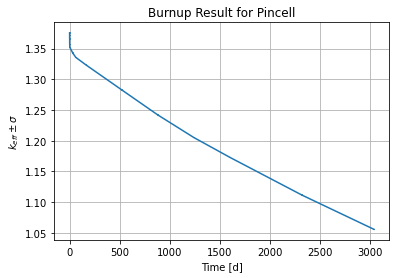

In [5]:
pyplot.errorbar(time,k[:,0],yerr=k[:,1]);
pyplot.title('Burnup Result for Pincell')
pyplot.xlabel('Time [d]');
pyplot.ylabel('$k_{eff} \pm \sigma$');
pyplot.grid()

In [6]:
chain = openmc.deplete.Chain.from_xml("chain_endfb71_pwr.xml")

In [7]:
chain.nuclide_dict

OrderedDict([('H1', 0),
             ('H2', 1),
             ('H3', 2),
             ('H4', 3),
             ('H5', 4),
             ('H6', 5),
             ('H7', 6),
             ('He3', 7),
             ('He4', 8),
             ('He5', 9),
             ('He6', 10),
             ('He7', 11),
             ('He8', 12),
             ('He9', 13),
             ('He10', 14),
             ('Li4', 15),
             ('Li5', 16),
             ('Li6', 17),
             ('Li7', 18),
             ('Li8', 19),
             ('Li9', 20),
             ('Li10', 21),
             ('Li11', 22),
             ('Li12', 23),
             ('Be5', 24),
             ('Be6', 25),
             ('Be7', 26),
             ('Be8', 27),
             ('Be9', 28),
             ('Be10', 29),
             ('Be11', 30),
             ('Be12', 31),
             ('Be13', 32),
             ('Be14', 33),
             ('Be15', 34),
             ('Be16', 35),
             ('B6', 36),
             ('B7', 37),
             ('B8', 

In [8]:
time, xe135 = results.get_atoms("1","Xe135")

Text(0, 0.5, 'Number of atoms - Xe135')

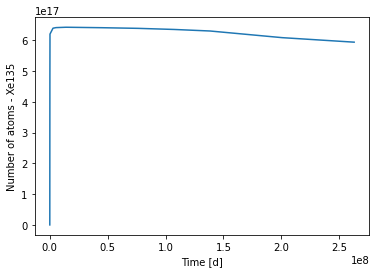

In [9]:
pyplot.plot(time,xe135,label="Xe135")
pyplot.xlabel("Time [d]")
pyplot.ylabel("Number of atoms - Xe135")

In [10]:
time, cs137 = results.get_atoms("1","Cs137")

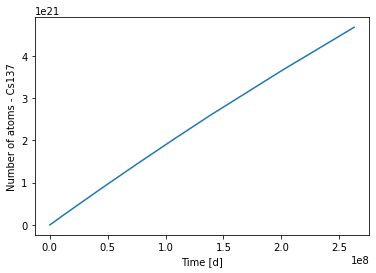

In [11]:
pyplot.plot(time,cs137,label="Cs137");
pyplot.xlabel("Time [d]");
pyplot.ylabel("Number of atoms - Cs137");